In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/Exp/Noise/0.2/experiment2"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis2'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 480.76it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8453.26it/s]


absolute alignment indicates number: 5 label diff indicates number: 10037 confidence diff indicates number: 38 high distance number: 12472


In [2]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8223.22it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7266.34it/s]


In [4]:
import os
autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=200,num_epochs=15)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8378.09it/s]


NET resnet18
Finish initialization...


100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]


Epoch [1/15], Loss: 43.7736, Loss decoder: 0.0015,Loss encoder: 0.0028,flip_loss: 49.79139709472656,pred_loss:43.24286651611328,loss_contrastive0.0,cka_loss0.02856558747589588


100%|██████████| 1/1 [00:00<00:00, 5184.55it/s]


Epoch [2/15], Loss: 35.3718, Loss decoder: 0.0014,Loss encoder: 0.0028,flip_loss: 49.66781234741211,pred_loss:34.849884033203125,loss_contrastive0.0,cka_loss0.021007360890507698


100%|██████████| 1/1 [00:00<00:00, 5343.06it/s]


Epoch [3/15], Loss: 25.9804, Loss decoder: 0.0013,Loss encoder: 0.0027,flip_loss: 49.77738952636719,pred_loss:25.460046768188477,loss_contrastive0.0,cka_loss0.018500447273254395


100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


Epoch [4/15], Loss: 19.4528, Loss decoder: 0.0013,Loss encoder: 0.0027,flip_loss: 50.199188232421875,pred_loss:18.931385040283203,loss_contrastive0.0,cka_loss0.015422523021697998


100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]


Epoch [5/15], Loss: 14.1593, Loss decoder: 0.0012,Loss encoder: 0.0027,flip_loss: 52.02587127685547,pred_loss:13.620037078857422,loss_contrastive0.0,cka_loss0.015045523643493652


100%|██████████| 1/1 [00:00<00:00, 4144.57it/s]


Epoch [6/15], Loss: 9.6242, Loss decoder: 0.0012,Loss encoder: 0.0027,flip_loss: 51.279502868652344,pred_loss:9.092940330505371,loss_contrastive0.0,cka_loss0.014618396759033203


100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]


Epoch [7/15], Loss: 6.8713, Loss decoder: 0.0011,Loss encoder: 0.0027,flip_loss: 50.914405822753906,pred_loss:6.344780445098877,loss_contrastive0.0,cka_loss0.013533353805541992


100%|██████████| 1/1 [00:00<00:00, 2522.13it/s]


Epoch [8/15], Loss: 4.9659, Loss decoder: 0.0011,Loss encoder: 0.0027,flip_loss: 50.834354400634766,pred_loss:4.441624164581299,loss_contrastive0.0,cka_loss0.012170910835266113


100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]


Epoch [9/15], Loss: 3.8078, Loss decoder: 0.0011,Loss encoder: 0.0026,flip_loss: 51.16754150390625,pred_loss:3.2800118923187256,loss_contrastive0.0,cka_loss0.012479901313781738


100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


Epoch [10/15], Loss: 2.8260, Loss decoder: 0.0010,Loss encoder: 0.0027,flip_loss: 50.82877731323242,pred_loss:2.3025410175323486,loss_contrastive0.0,cka_loss0.011415958404541016


100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


Epoch [11/15], Loss: 2.2843, Loss decoder: 0.0010,Loss encoder: 0.0027,flip_loss: 52.33418655395508,pred_loss:1.7459230422973633,loss_contrastive0.0,cka_loss0.011366188526153564


100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


Epoch [12/15], Loss: 1.9010, Loss decoder: 0.0010,Loss encoder: 0.0026,flip_loss: 51.17557907104492,pred_loss:1.3751776218414307,loss_contrastive0.0,cka_loss0.010473191738128662


100%|██████████| 1/1 [00:00<00:00, 3771.86it/s]


Epoch [13/15], Loss: 1.5452, Loss decoder: 0.0010,Loss encoder: 0.0026,flip_loss: 51.1746940612793,pred_loss:1.019694209098816,loss_contrastive0.0,cka_loss0.010149539448320866


100%|██████████| 1/1 [00:00<00:00, 5497.12it/s]


Epoch [14/15], Loss: 1.3906, Loss decoder: 0.0010,Loss encoder: 0.0026,flip_loss: 50.833648681640625,pred_loss:0.868818998336792,loss_contrastive0.0,cka_loss0.009910881519317627


100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]

Epoch [15/15], Loss: 1.2953, Loss decoder: 0.0009,Loss encoder: 0.0027,flip_loss: 51.783992767333984,pred_loss:0.7646960020065308,loss_contrastive0.0,cka_loss0.009127140045166016


In [ ]:
autoencoder_init = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),num_epochs=10)

In [6]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_b_features, autoencoder)

In [5]:
eval.eval_nn_train_ref_in_ref(15)

Wed May 10 21:14:12 2023 Building RP forest with 16 trees
Wed May 10 21:14:13 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed May 10 21:14:27 2023 Building RP forest with 16 trees
Wed May 10 21:14:28 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving ref in ref: 1.22/15 in epoch 200


1.22406

In [7]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Wed May 10 22:36:12 2023 Building RP forest with 16 trees
Wed May 10 22:36:13 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Wed May 10 22:36:28 2023 Building RP forest with 16 trees
Wed May 10 22:36:28 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.01/15 in epoch 200


1.01298

In [12]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.9901942476930443


In [10]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8545.92it/s]

refere  predction preserving:49140/50000 0.98
target  predction preserving:4920/50000 0.10
ref&tar pred_same preserving:3908/39963 0.10
ref&tar pred_diff preserving:974/10037 0.10


In [9]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 8427.24it/s]


long distance move subet number is 28846, short distance move set number is 45


100%|██████████| 250/250 [00:00<00:00, 8335.79it/s]


all reference distance preserving 49919/50000
all target distance preserving 27774/50000
short distance move direction preserving 20/45
long distance move direction preserving 16039/28846


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8535.97it/s]


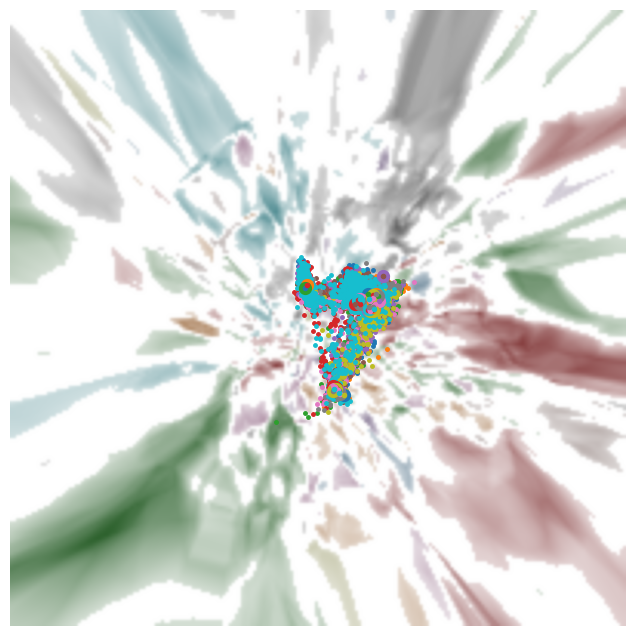

In [11]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))